In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/dataset_sliced.csv')

#Data preparation

In [3]:
X = data.iloc[:, 0:17]
y = data.iloc[:, 18]

In [5]:
S1 = data.loc[data['Subject'] == 'S1']
S1_X = S1.iloc[:, 0:17]
S1_y = S1.iloc[:, 18]

#Train and test datasets split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,  y_val = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

y.astype(np.float32)
X.astype(np.float32)

(38818, 17) (38818,) (25879, 17) (25879,)


,chest_ACC_x,chest_ACC_y,chest_ACC_z,Resp,ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.280000,32.130001,78.0,1.0,34.0,182.0,3.0,6.0,0.0
1,0.8520,-0.0666,-0.3826,2.915955,0.159714,-0.750000,-0.078125,0.671875,6.340000,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,1.0
2,0.8300,-0.0102,-0.3502,-1.623535,0.014603,-1.046875,-0.046875,0.843750,7.700000,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
3,0.7630,0.0552,-0.6070,0.416565,-0.307617,-0.859375,-0.390625,0.390625,-120.349998,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
4,0.8894,-0.0520,-0.2520,0.198364,0.604111,-1.015625,-0.078125,0.140625,-7.060000,32.150002,78.0,1.0,34.0,182.0,3.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64692,0.7874,-0.0146,-0.5400,1.446533,0.486740,-0.984375,0.156250,0.234375,7.300000,34.029999,79.0,1.0,28.0,183.0,2.0,5.0,1.0
64693,0.8936,-0.1080,0.4138,10.545349,-0.124466,-0.562500,-0.031250,0.718750,117.290001,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,0.0
64694,0.9012,0.0262,-0.1576,-7.260132,-0.138702,-0.375000,-0.203125,0.875000,39.549999,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,1.0
64695,0.8966,0.0104,-0.2252,1.187134,-0.288849,-1.421875,-0.046875,0.171875,-21.280001,34.000000,79.0,1.0,28.0,183.0,2.0,5.0,0.0


#Linear regression model

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

y_pred_LR = regressor_LR.predict(X_val)
mae_LR = mean_absolute_error(y_val, y_pred_LR)
mae_LR

13.699766711690632

In [8]:
S1_pred_LR = regressor_LR.predict(S1_X)
mean_absolute_error(S1_pred_LR, S1_y)

9.591662176867175

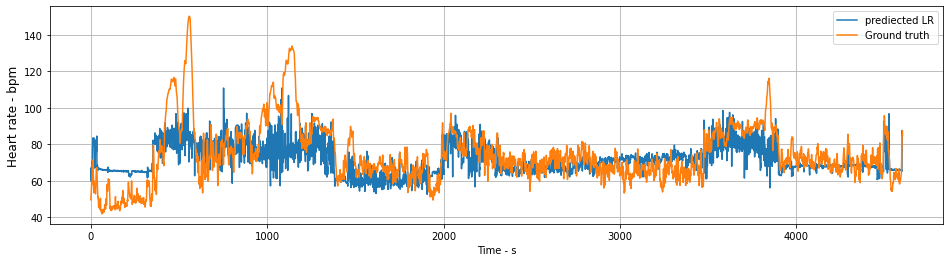

In [14]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( regressor_LR.predict(S1_X), label = 'prediected LR')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time - s')
plt.show()

#SVM Model(RBF)

In [9]:
#support vector machine
from sklearn.svm import SVR
regressor_RBF = SVR(kernel = 'rbf')
regressor_RBF.fit(X_train, y_train)
y_pred_RBF = regressor_RBF.predict(X_val)
mae_RBF = mean_absolute_error(y_val, y_pred_RBF)
mae_RBF

16.03955822864489

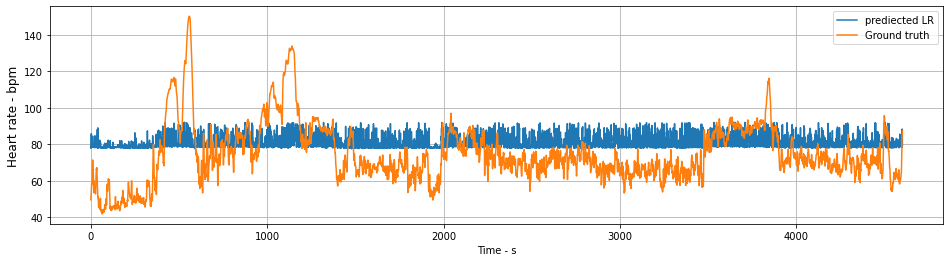

In [15]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( regressor_RBF.predict(S1_X), label = 'prediected LR')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time - s')
plt.show()

In [10]:
S1_pred_RBF = regressor_RBF.predict(S1_X)
mean_absolute_error(S1_pred_RBF, S1_y)

13.69643014272023

#SVM Model(Linear)

In [11]:
regressor_Linear = SVR(kernel="linear")
regressor_Linear.fit(X_train, y_train)
y_pred_Linear = regressor_Linear.predict(X_val)
mae_Linear = mean_absolute_error(y_val, y_pred_Linear)
mae_Linear

13.471622947261197

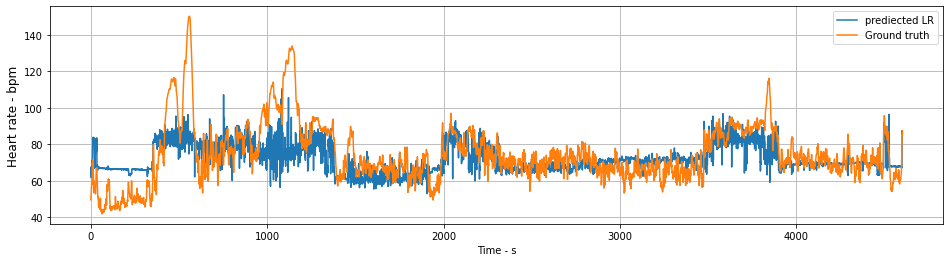

In [16]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( regressor_Linear.predict(S1_X), label = 'prediected LR')
plt.plot( S1_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time - s')
plt.show()

In [12]:
S1_pred_Linear = regressor_Linear.predict(S1_X)
mean_absolute_error(S1_pred_Linear, S1_y)

9.343255612125951